Found 703 validated image filenames belonging to 2 classes.
Found 325 validated image filenames belonging to 2 classes.
Epoch 1/10
22/22 [==============================] - 81s 4s/step - loss: 0.8612 - accuracy: 0.8094
Epoch 2/10
22/22 [==============================] - 80s 4s/step - loss: 0.1670 - accuracy: 0.9431
Epoch 3/10
22/22 [==============================] - 80s 4s/step - loss: 0.1166 - accuracy: 0.9602
Epoch 4/10
22/22 [==============================] - 81s 4s/step - loss: 0.0799 - accuracy: 0.9772
Epoch 5/10
22/22 [==============================] - 82s 4s/step - loss: 0.0492 - accuracy: 0.9872
Epoch 6/10
22/22 [==============================] - 82s 4s/step - loss: 0.0471 - accuracy: 0.9844
Epoch 7/10
22/22 [==============================] - 81s 4s/step - loss: 0.0106 - accuracy: 0.9986
Epoch 8/10
22/22 [==============================] - 79s 4s/step - loss: 0.0052 - accuracy: 1.0000
Epoch 9/10
22/22 [==============================] - 80s 4s/step - loss: 0.0030 - accuracy: 1.000

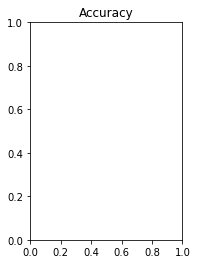

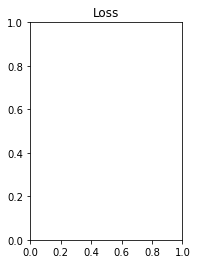

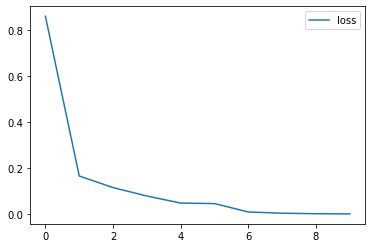

Test Accuracy
11/11 [==============================] - 41s 4s/step - loss: 0.7255 - accuracy: 0.8123


NameError: name 'test_acc' is not defined

In [1]:
import copy
import glob
import os
import time
from pathlib import Path
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from data_process import (add_noise, create_data, flip, greyscale,
                          normalization, rotate, process)


train_path = 'dataset/training_data'
test_path = 'dataset/testing_data'

df_train = process(train_path)
df_test = process(test_path)

EPOCHS = 10
BATCH_SIZE = 32
RANDOM_SEED = 42

train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_image = train_generator.flow_from_dataframe(dataframe=df_train,
                                                  x_col='filepaths',
                                                  y_col='labels',
                                                  target_size=(224, 224),
                                                  batch_size=BATCH_SIZE,
                                                  subset='training',
                                                  random_seed=RANDOM_SEED)

test_image = test_generator.flow_from_dataframe(dataframe=df_test,
                                                x_col='filepaths',
                                                y_col='labels',
                                                target_size=(224, 224),
                                                batch_size=BATCH_SIZE,
                                                random_seed=RANDOM_SEED
                                                )

pretrained_model = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)
pretrained_model.trainable = False  # We don't want to train again the resnet

inputs = pretrained_model.input

x = Dense(120, activation='relu')(pretrained_model.output)
x = Dense(120, activation='relu')(x)  # adding some custom layers of our coice

outputs = Dense(2, activation='sigmoid')(x)
# output choice
model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

mo_fit = model.fit(train_image, epochs=EPOCHS)

train_acc = mo_fit.history

plt.subplot(1,2,1)
plt.title("Accuracy")
pd.DataFrame(mo_fit.history)[['accuracy']].plot()

plt.subplot(1,2,2)
plt.title("Loss")
pd.DataFrame(mo_fit.history)[['loss']].plot()

plt.show()

print('Test Accuracy')
model.evaluate(test_image)

if test_acc > 0.8:
    savedFile = f'resnet/cv_image_resnet_{(test_acc*100):.0f}.pt'
    torch.save(model.state_dict(), savedFile)
    print("Export Path = "+savedFile)


In [2]:
mo_fit.history

{'loss': [0.8612356781959534,
  0.1669626086950302,
  0.11656492948532104,
  0.07989806681871414,
  0.04920986667275429,
  0.04706142470240593,
  0.010606659576296806,
  0.0052194674499332905,
  0.0029860164504498243,
  0.0021252369042485952],
 'accuracy': [0.8093883395195007,
  0.9431009888648987,
  0.9601706862449646,
  0.9772403836250305,
  0.9871976971626282,
  0.9843527674674988,
  0.9985775351524353,
  1.0,
  1.0,
  1.0]}

In [3]:
eval

<function eval(source, globals=None, locals=None, /)>

In [5]:
test_result = model.evaluate(test_image)

11/11 [==============================] - 38s 3s/step - loss: 0.7255 - accuracy: 0.8123


In [6]:
test_result

[0.7254683971405029, 0.8123077154159546]

In [15]:
#import torch
#savedFile = f'resnet/cv_image_resnet_{(test_result[1]*100):.0f}.pt'
#print("[INFO] serializing network to '{}'...".format(args["model"]))
model.save('resnet_model')

INFO:tensorflow:Assets written to: resnet_model\assets


C:\SDK\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\SDK\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [17]:
savedFile = f'resnet/cv_image_resnet_{(test_result[1]*100):.0f}.pt'
model.save(savedFile)

INFO:tensorflow:Assets written to: resnet/cv_image_resnet_81.pt\assets


C:\SDK\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\SDK\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)
